In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb
%matplotlib inline

plt.style.use('fivethirtyeight')

# Gathering our data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates = ['Date'])

df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis = 1)

# df.head()


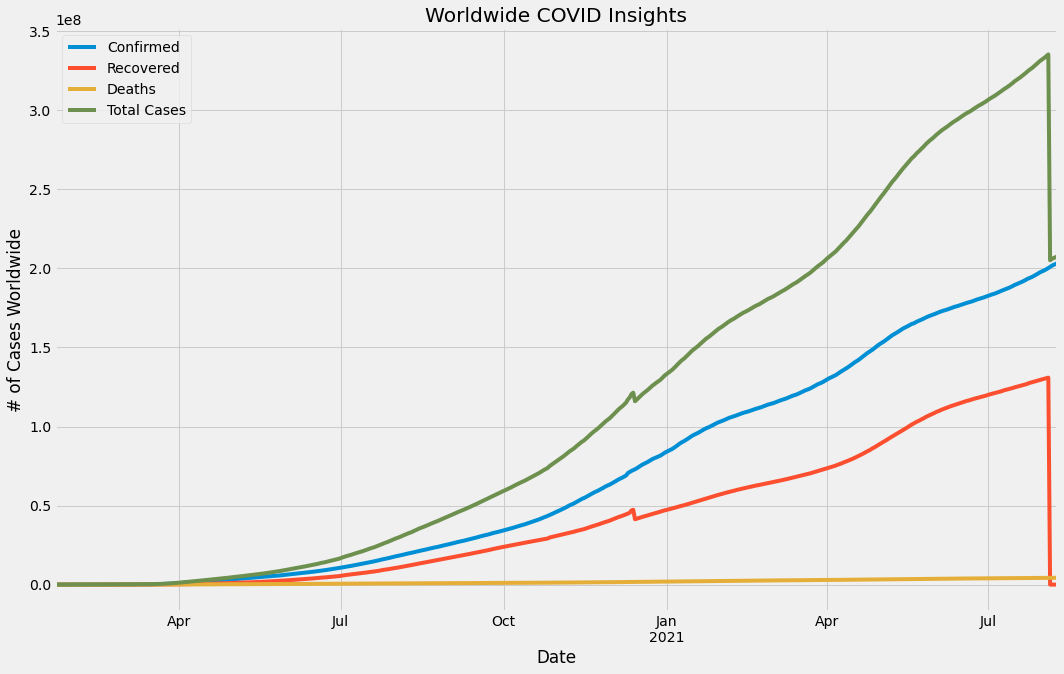

In [64]:
#Worldwide COVID insight - BOX plot
worldwide_df = df.groupby(['Date']).sum()
# worldwide_df.head()
w = worldwide_df.plot(figsize = (16, 10))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

plt.show()

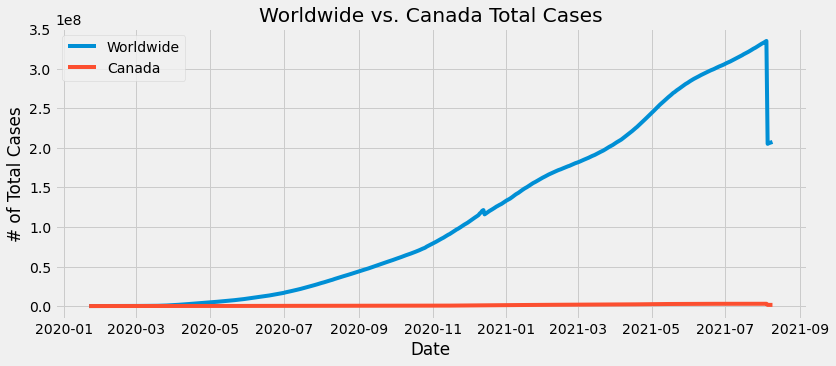

In [65]:
#Canada vs. Worldwide Cases - Box plot

canada_df = df[df['Country'] == 'Canada'].groupby(['Date']).sum()
# congo_df = df[df['Country'] == 'Congo (Brazzaville)'].groupby(['Date']).sum()

fig_canada = plt.figure(figsize = (12, 5))
# fig_congo = plt.figure(figsize = (12, 15))

ax = fig_canada.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label = 'Worldwide')
ax.plot(canada_df[['Total Cases']], label = 'Canada')
ax.set_xlabel('Date')
ax.set_ylabel('# of Total Cases')
ax.title.set_text('Worldwide vs. Canada Total Cases')

plt.legend(loc='upper left')
plt.show()

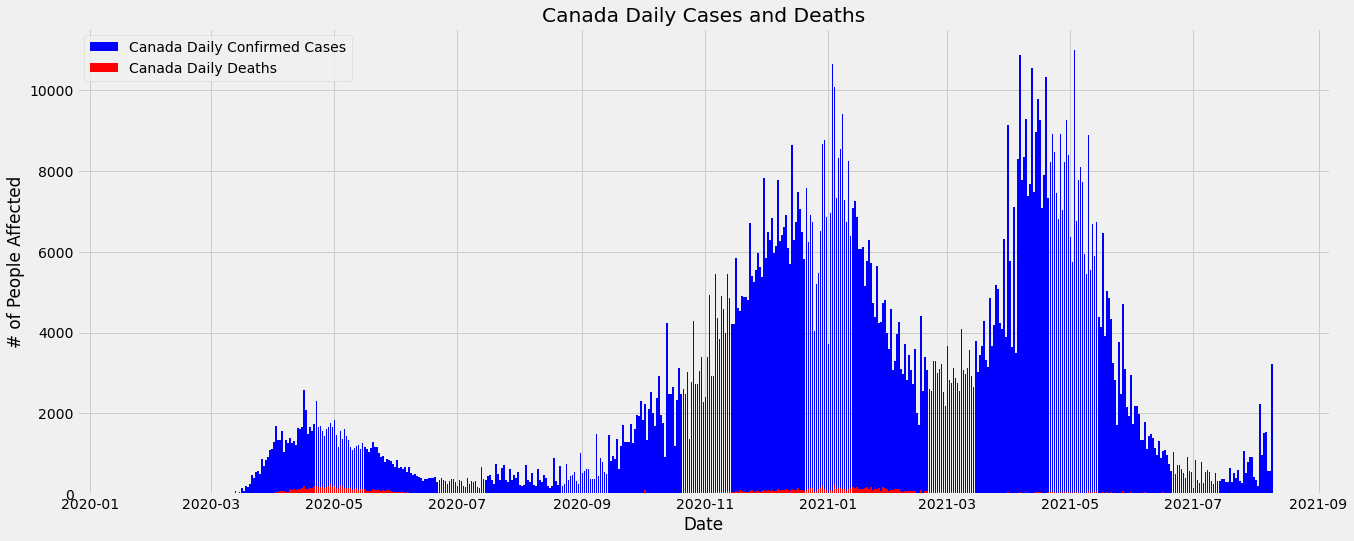

In [66]:
# Canada Daily Cases and Deaths - Histogram

canada_df = canada_df.reset_index()
canada_df['Daily Confirmed'] = canada_df['Confirmed'].sub(canada_df['Confirmed'].shift())
canada_df['Daily Deaths'] = canada_df['Deaths'].sub(canada_df['Deaths'].shift())

fig_canada = plt.figure(figsize = (20, 8))
ax = fig_canada.add_subplot(111)

ax.bar(canada_df['Date'], canada_df['Daily Confirmed'], color = 'b', label = 'Canada Daily Confirmed Cases')
ax.bar(canada_df['Date'], canada_df['Daily Deaths'], color = 'r', label = 'Canada Daily Deaths')

ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('Canada Daily Cases and Deaths')

plt.legend(loc = 'upper left')
plt.show()

In [82]:
# Canada COVID-19 Infection rates per month - Heatmap

# Read file and separate needed data subset
covid_all_countries = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', 
                                  usecols = [0, 1, 2], index_col = 0, parse_dates=[0])

In [68]:
#Filtering data for Canadian values only
covid_canada_confirmed = covid_all_countries.loc[covid_all_countries['Country']=='Canada']

In [83]:
# create a copy of the dataframe, and add columns for month and year
canada_heatmap = covid_canada_confirmed.copy()
canada_heatmap.drop(columns='Country', inplace=True)
canada_heatmap['month'] = canada_heatmap.index.month
canada_heatmap['year'] = canada_heatmap.index.year
# group by month and year, get the average
canada_heatmap = canada_heatmap.groupby(['month', 'year']).mean()
canada_heatmap = canada_heatmap.unstack(level=0)

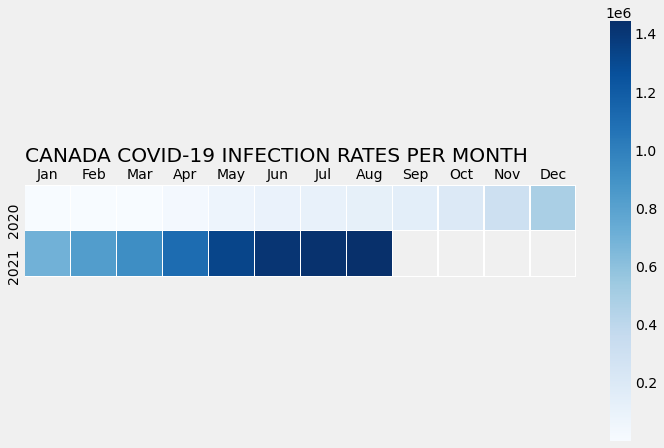

In [103]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(canada_heatmap, cmap="Blues", square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})

# xticks
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)

# axis labels
plt.xlabel('')
plt.ylabel('')

# title
title = 'Canada COVID-19 Infection rates per month'.upper()
plt.title(title, loc='left')
plt.show()